# Modelo: Creacion del modelo
#### Autor: Alejandro Romero del Campo


Este script parte del script de split. En este crearemos un modelo con la base de datos. Este modelo será una red neuronal convoulicional y se guardará en el mismo directorio que el script para ser utilizado posteriormente sin tener que crear un modelo cada vez.

Cargamos el directorio y las carpetas de train y test donde se encuentra la base de datos. 
Tambien definimos el número de clases.




In [1]:
import keras
keras.__version__
from keras import layers
from keras import models
from PIL import Image
import os


# The directory where we will
# store our smaller dataset
base_dir = './coronavirus'

# Directories for our training,
# validation and test splits
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'test')



subdirs_train = [subdir for subdir in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir))]

for subdir in subdirs_train:
# Randomly assign an image to train or validation folder
    path_train =os.path.join(train_dir, subdir)
    for filename in os.listdir(path_train):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"): 
            a=1        
        else:
            os.remove(os.path.join(path_train, filename))
            
            
subdirs_test = [subdir_test for subdir_test in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, subdir_test))]

for subdir_test in subdirs_test:   
    path_test =os.path.join(validation_dir, subdir_test)        
    for filename in os.listdir(path_test):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"): 
            a=1        
        else:
            os.remove(os.path.join(path_test, filename))

num_classes=2

Using TensorFlow backend.


Ahora definimos la red neuronal convolucional. Definimos las capas previas de convolución 2D así como las etapas de Pooling. Después se encuentra la capa densa y la última de las capas de la red.

Mediante la función model.sumary observamos la estructura de la red

In [2]:
model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), activation='relu',
                        input_shape=(50, 50, 3)))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(num_classes, activation='sigmoid'))

print(model.summary())


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2048)            

Reescalamos las imagenes y entrenamos el modelo, seleccionando las épocas que durará y el tamaño del batch

In [3]:
from keras import optimizers

model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-4),
              metrics=['acc'])


from keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
foto_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(50, 50),
        batch_size=batch_size,
   
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode= 'categorical')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(50, 50),
        batch_size=batch_size,
       
        class_mode='categorical')



for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break


history = model.fit_generator(
      train_generator,
      steps_per_epoch=20,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=20)

Found 22060 images belonging to 2 classes.
Found 5498 images belonging to 2 classes.
data batch shape: (32, 50, 50, 3)
labels batch shape: (32, 2)
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Epoch 1/20
20/20 [==============================] - 5s 251ms/step - loss: 0.6977 - acc: 0.5141 - val_loss: 0.6889 - val_acc: 0.4766
Epoch 2/20
20/20 [==============================] - 3s 167ms/step - loss: 0.6925 - acc: 0.5391 - val_loss: 0.6928 - val_acc: 0.6344
Epoch 3/20
20/20 [==============================] - 3s 156ms/step - loss: 0.6889 - acc: 0.5391 - val_loss: 0.7413 - val_acc: 0.4953
Epoch 4/20
20/20 [==============================] - 5s 265ms/step - loss: 0.6774 - acc: 0.5953 - val_loss: 0.7597 - val_acc: 0.4938
Epoch 5/20
20/20 [==============================] - 5s 234ms/step - loss: 0.6707 - acc: 0.5968 - val_loss: 0.7249 - val_acc: 0.6453
Epoch 6/20
20/20 [==============================] - 4s 191ms/step - loss: 0.6648 - acc: 0.5844 - v

Finalemente comprobamos la precisión del modelo, así como las pérdidas de forma gráfica

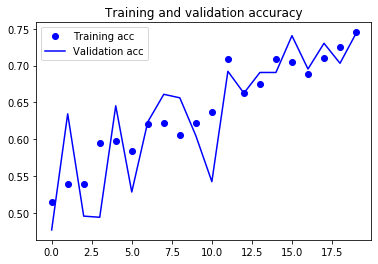

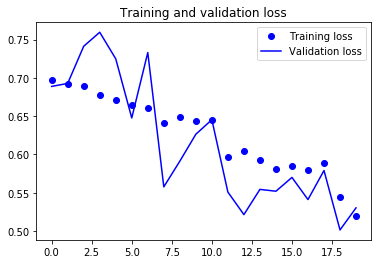

In [4]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()



Mediante la funcion model.save guardamos el modelo en el directorio

In [5]:
model.save('my_model.h5')